# Floral Department Analytics
*Daily SKU sales, pricing, promos, holidays, and weather — quick EDA & cleaning notebook.*




In [1]:
# Loading the dataset using pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV
df = pd.read_csv(r"D:\MGA\job\data analyst\DailySKU_raw.csv")

In [2]:
df.head()

,date,sku,category,price,cost,on_hand_beg,delivery_qty,sales_qty,markdown_qty,waste_qty,promo_flag,holiday_flag,weather_index
0,2024-12-01,ROSE-12,Bouquet,24.99,10.5,0,26,8,4,4,0,0,0.938
1,2024-12-01,TULIP-10,Bouquet,14.99,6.2,0,19,11,0,2,0,0,1.034
2,2024-12-01,LILY-5,Bouquet,19.99,8.0,0,14,7,0,2,0,0,1.033
3,2024-12-01,ORCHID-POT,Plant,29.99,12.0,0,8,4,0,0,0,0,1.053
4,2024-12-01,MIX-GREEN,Arrangement,34.99,15.0,0,9,3,1,1,0,0,0.943


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1826 non-null   object 
 1   sku            1821 non-null   object 
 2   category       1821 non-null   object 
 3   price          1826 non-null   float64
 4   cost           1819 non-null   float64
 5   on_hand_beg    1826 non-null   int64  
 6   delivery_qty   1826 non-null   int64  
 7   sales_qty      1826 non-null   int64  
 8   markdown_qty   1826 non-null   int64  
 9   waste_qty      1826 non-null   int64  
 10  promo_flag     1826 non-null   int64  
 11  holiday_flag   1826 non-null   int64  
 12  weather_index  1826 non-null   float64
dtypes: float64(3), int64(7), object(3)
memory usage: 185.6+ KB


In [4]:
# Summary statistics using .describe()
df.describe(include='all')

,date,sku,category,price,cost,on_hand_beg,delivery_qty,sales_qty,markdown_qty,waste_qty,promo_flag,holiday_flag,weather_index
count,1826,1821,1821,1826.000000,1819.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
unique,365,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-02-25,TULIP-10,Bouquet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,365,1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,24.973357,10.333260,5.596386,10.508215,7.634721,0.903067,1.939211,0.077218,0.037788,0.999347
std,NaN,NaN,NaN,7.083121,3.071661,5.010211,9.036012,5.300988,1.945820,2.292364,0.269054,0.193586,0.058130
min,NaN,NaN,NaN,9.600000,6.200000,0.000000,0.000000,-16.000000,0.000000,-3.000000,0.000000,-1.000000,0.900000
25%,NaN,NaN,NaN,19.990000,8.000000,3.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.948000
50%,NaN,NaN,NaN,24.990000,10.500000,5.000000,9.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.999000
75%,NaN,NaN,NaN,29.990000,12.000000,7.000000,14.000000,10.000000,1.000000,3.000000,0.000000,0.000000,1.049000


In [5]:
# Checking if missing data or null values are present in the dataset

df.isnull().sum()

date             0
sku              5
category         5
price            0
cost             7
on_hand_beg      0
delivery_qty     0
sales_qty        0
markdown_qty     0
waste_qty        0
promo_flag       0
holiday_flag     0
weather_index    0
dtype: int64

In [6]:
# Cost → category median

df["cost"] = df["cost"].fillna(df.groupby("category")["cost"].transform("median")).fillna(df["cost"].median())


# Category → global mode
df["category"] = df["category"].fillna(df["category"].mode().iat[0])

# give a simple placeholder
df["sku"] = df["sku"].fillna("SKU_MISSING")




In [7]:
df.isnull().sum()


date             0
sku              0
category         0
price            0
cost             0
on_hand_beg      0
delivery_qty     0
sales_qty        0
markdown_qty     0
waste_qty        0
promo_flag       0
holiday_flag     0
weather_index    0
dtype: int64

# Quick EDA

In [8]:
# a) types + key sanity
df["date"] = pd.to_datetime(df["date"])
print("Rows:", len(df))
print("Unique (date, sku):", df[["date","sku"]].drop_duplicates().shape[0])


Rows: 1826
Unique (date, sku): 1825


In [9]:
# b) quick peeks
display(df.head(10))
display(df.describe())

,date,sku,category,price,cost,on_hand_beg,delivery_qty,sales_qty,markdown_qty,waste_qty,promo_flag,holiday_flag,weather_index
0,2024-12-01,ROSE-12,Bouquet,24.99,10.5,0,26,8,4,4,0,0,0.938
1,2024-12-01,TULIP-10,Bouquet,14.99,6.2,0,19,11,0,2,0,0,1.034
2,2024-12-01,LILY-5,Bouquet,19.99,8.0,0,14,7,0,2,0,0,1.033
3,2024-12-01,ORCHID-POT,Plant,29.99,12.0,0,8,4,0,0,0,0,1.053
4,2024-12-01,MIX-GREEN,Arrangement,34.99,15.0,0,9,3,1,1,0,0,0.943
5,2024-12-02,ROSE-12,Bouquet,24.99,10.5,10,13,13,0,3,0,0,0.959
6,2024-12-02,TULIP-10,Bouquet,14.99,6.2,6,11,4,3,3,0,0,1.033
7,2024-12-02,LILY-5,Bouquet,19.99,8.0,5,7,5,0,2,0,0,0.992
8,2024-12-02,ORCHID-POT,Plant,29.99,12.0,4,3,2,1,0,0,0,1.026
9,2024-12-02,MIX-GREEN,Arrangement,34.99,15.0,4,5,6,0,1,0,0,1.082


,date,price,cost,on_hand_beg,delivery_qty,sales_qty,markdown_qty,waste_qty,promo_flag,holiday_flag,weather_index
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,2025-05-31 22:44:17.612267264,24.973357,10.336364,5.596386,10.508215,7.634721,0.903067,1.939211,0.077218,0.037788,0.999347
min,2024-12-01 00:00:00,9.600000,6.200000,0.000000,0.000000,-16.000000,0.000000,-3.000000,0.000000,-1.000000,0.900000
25%,2025-03-02 00:00:00,19.990000,8.000000,3.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.948000
50%,2025-06-01 00:00:00,24.990000,10.500000,5.000000,9.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.999000
75%,2025-08-31 00:00:00,29.990000,12.000000,7.000000,14.000000,10.000000,1.000000,3.000000,0.000000,0.000000,1.049000
max,2025-11-30 00:00:00,34.990000,15.000000,47.000000,105.000000,41.000000,17.000000,21.000000,2.000000,1.000000,1.100000
std,NaN,7.083121,3.071606,5.010211,9.036012,5.300988,1.945820,2.292364,0.269054,0.193586,0.058130


In [10]:
# c) totals & rates
df["revenue"] = df["price"] * df["sales_qty"]
df["cost_amt"] = df["cost"] * df["sales_qty"]
df["gm"] = df["revenue"] - df["cost_amt"]
df["gm_pct"] = (df["gm"] / df["revenue"]).replace([np.inf, -np.inf], np.nan)


In [11]:
# d) top SKUs / categories
print(df["sku"].value_counts().head(10))
print(df["category"].value_counts())

sku
TULIP-10       365
ROSE-12        364
LILY-5         364
ORCHID-POT     364
MIX-GREEN      364
SKU_MISSING      5
Name: count, dtype: int64
category
Bouquet        1098
Arrangement     365
Plant           363
Name: count, dtype: int64


In [12]:
# e) daily totals (time series check)
daily = df.groupby("date", as_index=False).agg(
    revenue=("revenue","sum"),
    units=("sales_qty","sum"),
    markdown=("markdown_qty","sum"),
    waste=("waste_qty","sum")
)
display(daily.head())


,date,revenue,units,markdown,waste
0,2024-12-01,729.67,33,5,9
1,2024-12-02,754.70,30,4,9
2,2024-12-03,674.70,30,4,9
3,2024-12-04,694.70,30,4,8
4,2024-12-05,884.62,38,3,7


In [13]:
# f) promo/holiday lift (simple aggregates)
agg_cols = {"revenue":"sum","sales_qty":"sum","gm":"sum"}
promo_cmp = df.groupby("promo_flag").agg(agg_cols)
holiday_cmp = df.groupby("holiday_flag").agg(agg_cols)
display(promo_cmp, holiday_cmp)

,revenue,sales_qty,gm
promo_flag,,,
0,294308.69,12553,172145.39
1,31816.15,1385,18661.65
2,104.97,3,59.97


,revenue,sales_qty,gm
holiday_flag,,,
-1,44.97,3,26.37
0,295143.19,12603,172676.69
1,31041.65,1335,18163.95


In [14]:
# g) outlier scan (simple IQR on revenue per row)
q1, q3 = df["revenue"].quantile([0.25, 0.75])
iqr = q3 - q1
outlier_mask = (df["revenue"] < q1 - 1.5*iqr) | (df["revenue"] > q3 + 1.5*iqr)
print("Row-level revenue outliers:", outlier_mask.sum())

Row-level revenue outliers: 117


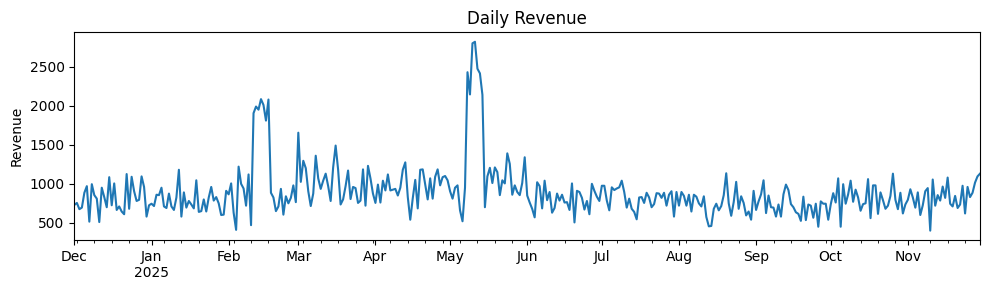

In [15]:
#Daily revenue (line) chart

import pandas as pd
import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df["date"])
df["revenue"] = df["price"] * df["sales_qty"]
df.groupby(pd.Grouper(key="date", freq="D"))["revenue"].sum().plot(kind="line", figsize=(10, 3), title="Daily Revenue")
plt.xlabel("")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

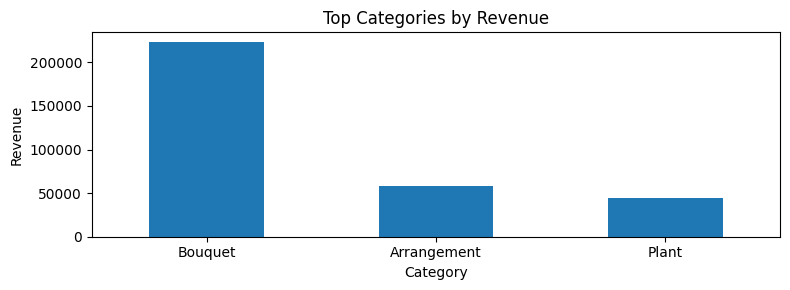

In [16]:
#Top categories (bar)
import matplotlib.pyplot as plt

df["revenue"] = df["price"] * df["sales_qty"]

(df.groupby("category")["revenue"].sum()
   .sort_values(ascending=False).head(10)
   .plot(kind="bar", figsize=(8,3)))
plt.title("Top Categories by Revenue"); plt.xlabel("Category"); plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout(); plt.show()


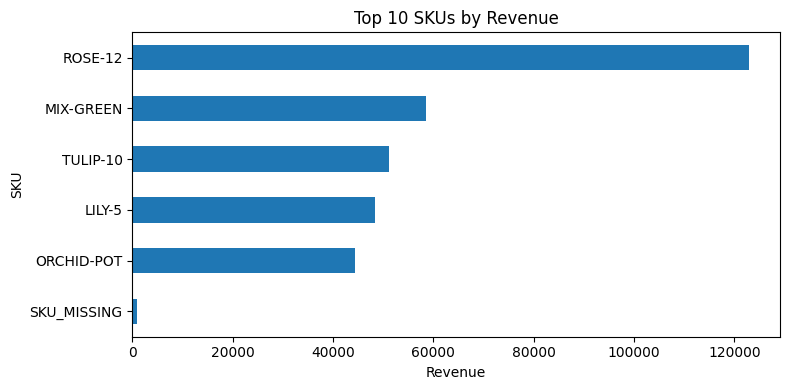

In [17]:
#Top SKUs (horizontal bar)
sku = (df.groupby("sku")["revenue"]
         .sum()
         .sort_values(ascending=False)
         .head(10))
ax = sku.plot(kind="barh", figsize=(8,4))
ax.invert_yaxis()
ax.set_title("Top 10 SKUs by Revenue")
ax.set_xlabel("Revenue"); ax.set_ylabel("SKU")
plt.tight_layout(); plt.show(); plt.close()


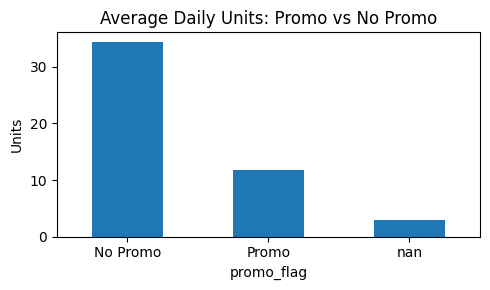

In [18]:
#Promo vs No Promo average daily units (bar)
if "promo_flag" in df.columns:
    promo_units = (df.groupby(["promo_flag","date"])["sales_qty"].sum()
                     .groupby("promo_flag").mean())
    promo_units.index = promo_units.index.map({0:"No Promo", 1:"Promo"})
    ax = promo_units.plot(kind="bar", figsize=(5,3))
    ax.set_title("Average Daily Units: Promo vs No Promo")
    ax.set_ylabel("Units"); ax.tick_params(axis='x', rotation=0)
    plt.tight_layout(); plt.show(); plt.close()


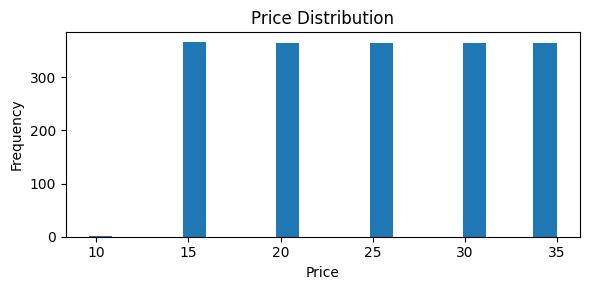

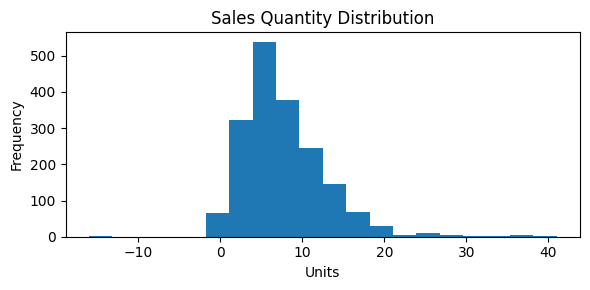

In [19]:
#Histograms (price & units)
if "price" in df.columns:
    ax = df["price"].plot(kind="hist", bins=20, figsize=(6,3))
    ax.set_title("Price Distribution"); ax.set_xlabel("Price")
    plt.tight_layout(); plt.show(); plt.close()

ax = df["sales_qty"].plot(kind="hist", bins=20, figsize=(6,3))
ax.set_title("Sales Quantity Distribution"); ax.set_xlabel("Units")
plt.tight_layout(); plt.show(); plt.close()


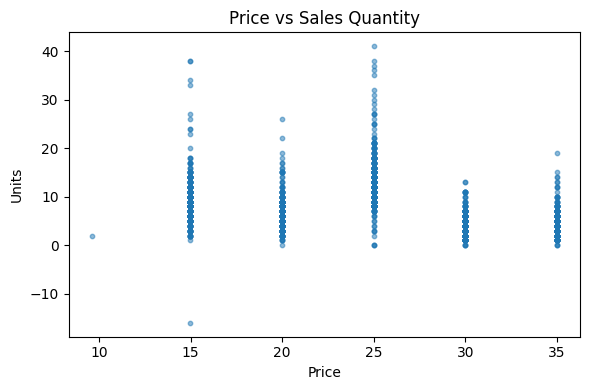

In [20]:
#Price vs. Sales (scatter)
valid = df[["price","sales_qty"]].dropna()
plt.figure(figsize=(6,4))
plt.scatter(valid["price"], valid["sales_qty"], s=10, alpha=0.5)
plt.title("Price vs Sales Quantity"); plt.xlabel("Price"); plt.ylabel("Units")
plt.tight_layout(); plt.show(); plt.close()


# Finish essential cleaning

In [21]:
# --- Trim & standardize text ---
for col in ["sku","category"]:
    df[col] = df[col].astype("string").str.strip()
df["category"] = df["category"].str.title()

# --- Enforce numeric where it matters ---
num_cols = ["price","cost","on_hand_beg","delivery_qty","sales_qty",
            "markdown_qty","waste_qty","weather_index"]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# --- Fix flags to 0/1 ints ---
for f in ["promo_flag","holiday_flag"]:
    df[f] = pd.to_numeric(df[f], errors="coerce").clip(0,1).fillna(0).astype(int)

# --- Clip negative quantities to 0 ---
for c in ["on_hand_beg","delivery_qty","sales_qty","markdown_qty","waste_qty"]:
    df[c] = df[c].clip(lower=0).fillna(0).astype(int)

# --- Ensure price >= cost (floor price at cost when violated) ---
mask = df["price"] < df["cost"]
df.loc[mask, "price"] = df.loc[mask, "cost"]

# --- Recompute core metrics after cleaning ---
df["revenue"]  = df["price"] * df["sales_qty"]
df["cost_amt"] = df["cost"]  * df["sales_qty"]
df["gm"]       = df["revenue"] - df["cost_amt"]
df["gm_pct"]   = (df["gm"] / df["revenue"]).replace([np.inf, -np.inf], np.nan)

# --- Sort & export (clean version) ---
df = df.sort_values(["date","sku"]).reset_index(drop=True)
out_path = r"D:\MGA\job\data analyst\clean_daily_sku.csv"   # change if you like
df.to_csv(out_path, index=False)
out_path


'D:\\MGA\\job\\data analyst\\clean_daily_sku.csv'

# Connecting Python script to PostgreSQL

In [22]:
!pip install psycopg2-binary sqlalchemy

In [23]:
from sqlalchemy import create_engine

# Step 1: Connect to PostgreSQL
# Replace placeholders with your actual details
username = "postgres"      # default user
password = "postdata123" # the password you set during installation
host = "localhost"         # if running locally
port = "5432"              # default PostgreSQL port
database = "floral_department_daily_sku" # the database you created in pgAdmin

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
table_name = "dailysku"   # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")


Data successfully loaded into table 'dailysku' in database 'floral_department_daily_sku'.
